In [115]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
%matplotlib inline


df = pd.read_csv('/Users/nickpourazima/GitHub/he-sm/Completed Tests/Combo/FinalMaster.csv',parse_dates=True)
users = ['394','390','399','486','591','510','729','932','521','514','379','824','506','552','367','410']
testList = ['A1a1','A1a2','A1a3','A1a4','A1b1','A1b2','A1b3','A1b4','A2a1','A2a2','A2a3','A2a4','A2b1','A2b2','A2b3','A2b4',
       'A3a1','A3a2','A3a3','A3a4','A3b1','A3b2','A3b3','A3b4','A4a1','A4a2','A4a3','A4a4','A4b1','A4b2','A4b3','A4b4',
       'H1a1','H1a2','H1a3','H1a4','H1b1','H1b2','H1b3','H1b4','H2a1','H2a2','H2a3','H2a4','H2b1','H2b2','H2b3','H2b4']
hapticTests=['H1a1','H1a2','H1a3','H1a4','H1b1','H1b2','H1b3','H1b4','H2a1','H2a2','H2a3','H2a4','H2b1','H2b2','H2b3','H2b4']
audibleTests=['A1a1','A1a2','A1a3','A1a4','A1b1','A1b2','A1b3','A1b4','A2a1','A2a2','A2a3','A2a4','A2b1','A2b2','A2b3','A2b4',
       'A3a1','A3a2','A3a3','A3a4','A3b1','A3b2','A3b3','A3b4','A4a1','A4a2','A4a3','A4a4','A4b1','A4b2','A4b3','A4b4']
h1=['H1a1','H1a2','H1a3','H1a4','H1b1','H1b2','H1b3','H1b4']
h2=['H2a1','H2a2','H2a3','H2a4','H2b1','H2b2','H2b3','H2b4']
a1=['A1a1','A1a2','A1a3','A1a4','A1b1','A1b2','A1b3','A1b4']
a2=['A2a1','A2a2','A2a3','A2a4','A2b1','A2b2','A2b3','A2b4']
a3=['A3a1','A3a2','A3a3','A3a4','A3b1','A3b2','A3b3','A3b4']
a4=['A4a1','A4a2','A4a3','A4a4','A4b1','A4b2','A4b3','A4b4']
df = df[df.Test.isin(testList)]
df = df[df["User ID"].isin(users)]
df2 = df[df["User ID"].isin(subSetUsers)]
df["Sanitized Asynchrony"]=df["Sanitized Asynchrony"].abs()
df["Latency Corrected Sanitized Asynchrony"]=df["Latency Corrected Sanitized Asynchrony"].abs()

In [116]:
df.columns

Index(['Unnamed: 0', 'Asynchrony', 'Group', 'IOI', 'Instrument', 'Max',
       'Mean Asynchrony', 'Min', 'Missed Taps', 'Phase Correction Response',
       'Sanitized Asynchrony', 'Sanitized Mean Asynchrony',
       'Sanitized Std Dev Asynchrony', 'Sanitized Tap Onset',
       'Std Dev Asynchrony', 'Tap Onset', 'Test', 'True Onset', 'User ID',
       'Latency Correction Factor', 'Latency Corrected Sanitized Asynchrony',
       'Type'],
      dtype='object')

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


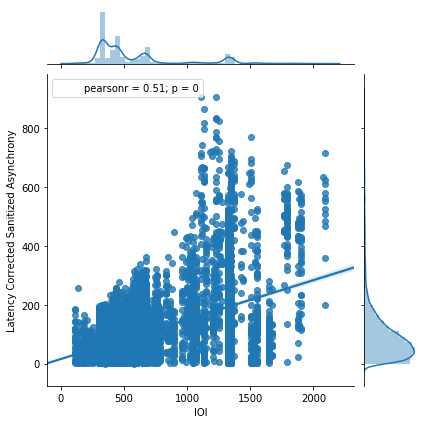

In [117]:
# new = df[df.Test.isin(audibleTests)]
# new = df[df.Group.isin(["Neither","Amateur"])]
sns.jointplot(x="IOI",y="Latency Corrected Sanitized Asynchrony",data=df,kind="reg")

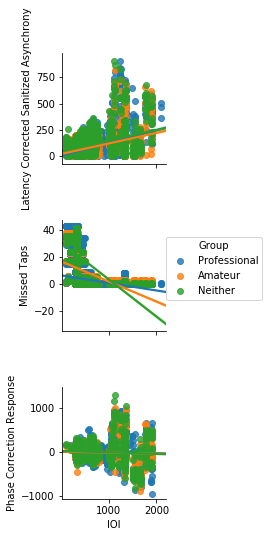

In [39]:
sns.pairplot(df, x_vars=["IOI"], y_vars=["Latency Corrected Sanitized Asynchrony","Missed Taps","Phase Correction Response"],
             hue="Group", kind="reg");

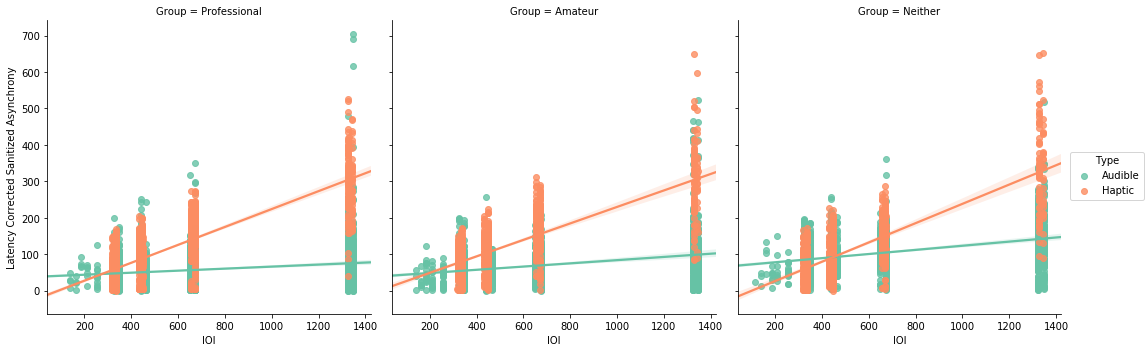

In [118]:
#STEADY MODE
sns.lmplot("IOI","Latency Corrected Sanitized Asynchrony",col="Group",hue="Type",data=df[df.Test.isin(a1+a2+h1)], palette="Set2")

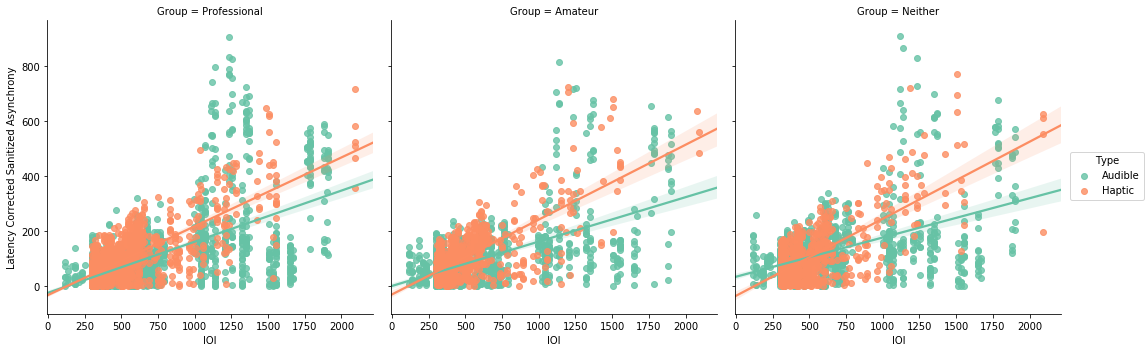

In [119]:
#DYNAMIC MODE
sns.lmplot("IOI","Latency Corrected Sanitized Asynchrony",col="Group",hue="Type",data=df[df.Test.isin(a3+a4+h2)], palette="Set2")

KeyboardInterrupt: 

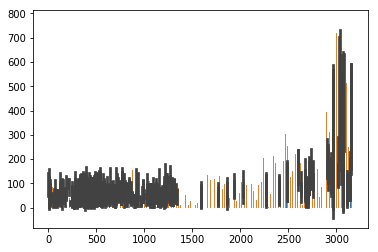

In [120]:
f, ax = plt.subplots()
# loc = plticker.MultipleLocator(base=50.0) # this locator puts ticks at regular intervals
# ax.xaxis.set_major_locator(loc)
# ax.set(xlim=(0, 2000))
sns.barplot("IOI","Latency Corrected Sanitized Asynchrony",ci="sd",data=df[df.Test.isin(a3+a4+h2)],hue="Type",dodge=True).set_xticks(ax.get_xticks()[::250])
plt.xticks(rotation=45)